In [1]:
import altair as alt
import numpy as np
import pandas as pd
import math

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
data = pd.read_csv("./data/cleaned_acc_data.csv")

In [4]:
data_new2 = data.groupby(by = ["intake_monthyear","animal_type"]).agg({"intake_weekday":"count"}).reset_index()

In [5]:

data['intake_year'] = pd.DatetimeIndex(data['intake_monthyear']).year

In [6]:
data_new_filter = data[((data['intake_year'] >= 2013) & (data['intake_year'] <= 2015))]
data_new_filter.head()

,animal_type,breed,intake_monthyear,intake_weekday,age_upon_intake_(days),intake_condition,intake_type,sex_upon_intake,outcome_monthyear,outcome_weekday,age_upon_outcome_(days),outcome_type,sex_upon_outcome,total_time_in_shelter_days,outcome_types,intake_year
1,Dog,Dachshund,2014-04,Wednesday,3650,Normal,Owner Surrender,Neutered Male,2014-04,Monday,3650,Transfer,Neutered Male,4.970139,Transfer,2014
2,Dog,Shetland Sheepdog,2013-11,Saturday,5840,Injured,Public Assist,Neutered Male,2013-11,Saturday,5840,Return to Owner,Neutered Male,0.119444,Return to Owner,2013
3,Dog,Labrador Retriever/Pit Bull,2013-11,Saturday,5475,Aged,Stray,Spayed Female,2013-11,Sunday,5475,Return to Owner,Spayed Female,0.870833,Return to Owner,2013
4,Dog,Miniature Schnauzer Mix,2014-11,Friday,5475,Normal,Stray,Intact Female,2014-11,Friday,5475,Return to Owner,Intact Female,0.178472,Return to Owner,2014
5,Dog,Lhasa Apso Mix,2014-09,Monday,5475,Normal,Stray,Neutered Male,2014-09,Monday,5475,Return to Owner,Neutered Male,0.213194,Return to Owner,2014


In [7]:
data.head()

,animal_type,breed,intake_monthyear,intake_weekday,age_upon_intake_(days),intake_condition,intake_type,sex_upon_intake,outcome_monthyear,outcome_weekday,age_upon_outcome_(days),outcome_type,sex_upon_outcome,total_time_in_shelter_days,outcome_types,intake_year
0,Dog,Spinone Italiano Mix,2017-12,Thursday,3650,Normal,Stray,Neutered Male,2017-12,Thursday,3650,Return to Owner,Neutered Male,2.961806,Return to Owner,2017
1,Dog,Dachshund,2014-04,Wednesday,3650,Normal,Owner Surrender,Neutered Male,2014-04,Monday,3650,Transfer,Neutered Male,4.970139,Transfer,2014
2,Dog,Shetland Sheepdog,2013-11,Saturday,5840,Injured,Public Assist,Neutered Male,2013-11,Saturday,5840,Return to Owner,Neutered Male,0.119444,Return to Owner,2013
3,Dog,Labrador Retriever/Pit Bull,2013-11,Saturday,5475,Aged,Stray,Spayed Female,2013-11,Sunday,5475,Return to Owner,Spayed Female,0.870833,Return to Owner,2013
4,Dog,Miniature Schnauzer Mix,2014-11,Friday,5475,Normal,Stray,Intact Female,2014-11,Friday,5475,Return to Owner,Intact Female,0.178472,Return to Owner,2014


In [8]:
data_new = data[data['intake_monthyear'].str.contains('2017')].groupby(by = "intake_weekday").agg({"animal_type":"count"}).reset_index()
data_new.columns = ["intake_weekday","count"]
data_new.head()

,intake_weekday,count
0,Friday,2312
1,Monday,2510
2,Saturday,2228
3,Sunday,2148
4,Thursday,2248


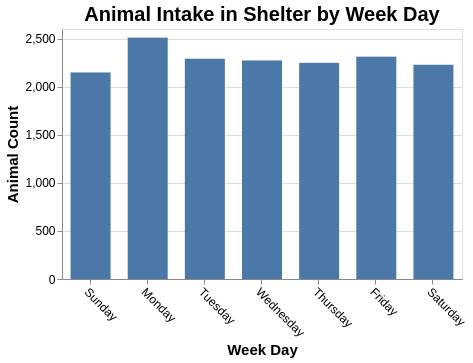

In [9]:
chart = alt.Chart(data_new).mark_bar(size=40).encode(
            alt.X('intake_weekday:N', title = 'Week Day',sort=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]),
            alt.Y('count:Q', title = 'Animal Count')
        ).properties(title='Animal Intake in Shelter by Week Day',
                    width=400, height=250).configure_axisX(labelFontSize=12,
    titleFontSize=15,
    labelAngle = 45).configure_axisY(labelFontSize=12,
    titleFontSize=15).configure_title(fontSize=20)
chart

In [10]:
data_new = data[data['outcome_monthyear'].str.contains('2017')].groupby(by = "outcome_weekday").agg({"animal_type":"count"}).reset_index()
data_new.columns = ["outcome_weekday","count"]
data_new.head()

,outcome_weekday,count
0,Friday,2308
1,Monday,2281
2,Saturday,2547
3,Sunday,2268
4,Thursday,2130


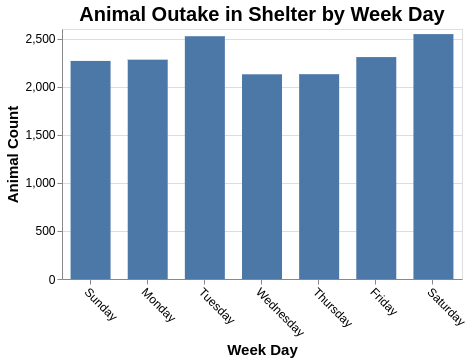

In [11]:
chart = alt.Chart(data_new).mark_bar(size=40).encode(
            alt.X('outcome_weekday:N', title = 'Week Day',sort=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]),
            alt.Y('count:Q', title = 'Animal Count')
        ).properties(title='Animal Outake in Shelter by Week Day',
                    width=400, height=250).configure_axisX(labelFontSize=12,
    titleFontSize=15,
    labelAngle = 45).configure_axisY(labelFontSize=12,
    titleFontSize=15).configure_title(fontSize=20)
chart

In [17]:
data_new = data.groupby(by = "intake_monthyear").agg({"animal_type":"count"}).reset_index()
data_new.columns = ["intake_monthyear","count"]
data_new["Type"] = "Intake"
data_new.head()

,intake_monthyear,count,Type
0,2013-10,1438,Intake
1,2013-11,1185,Intake
2,2013-12,1143,Intake
3,2014-01,1115,Intake
4,2014-02,1037,Intake


In [18]:
data_new1 = data.groupby(by = "outcome_monthyear").agg({"animal_type":"count"}).reset_index()
data_new1.columns = ["outcome_monthyear","count"]
data_new1["Type"] = "Outake"
data_new1.head()

,outcome_monthyear,count,Type
0,2013-10,982,Outake
1,2013-11,1077,Outake
2,2013-12,1302,Outake
3,2014-01,1067,Outake
4,2014-02,988,Outake


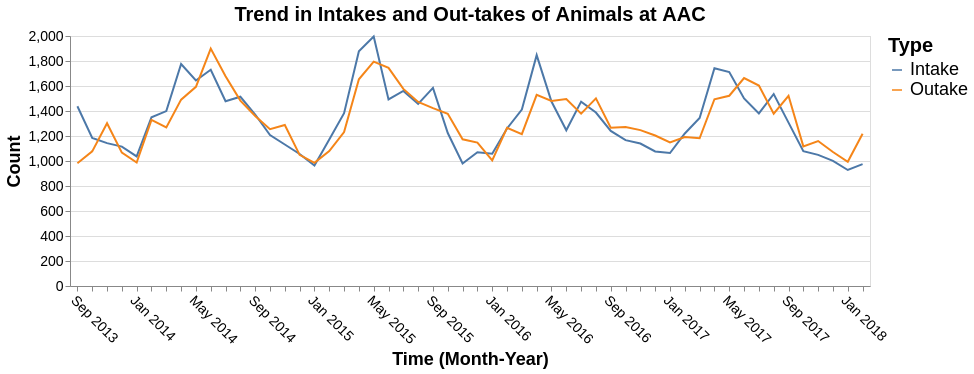

In [56]:
chart = alt.Chart(data_new).mark_line().encode(
        alt.X("yearmonth(intake_monthyear):O", title = "Time (Month-Year)"),
        alt.Y('count', title="Count"),
        alt.Color("Type")
        )

chart1 = alt.Chart(data_new1[data_new1['outcome_monthyear'] != "2018-04"]).mark_line().encode(
        alt.X("yearmonth(outcome_monthyear):O", title = "Time (Month-Year)"),
        alt.Y('count', title="Count"),
        alt.Color("Type")
        )

(chart + chart1).properties(title='Trend in Intakes and Out-takes of Animals at AAC',
                    width=800, height=250).configure_axisX(labelFontSize=14,
    titleFontSize=18, labelAngle = 45,labelOverlap=True).configure_axisY(labelFontSize=14,
    titleFontSize=18).configure_title(fontSize=20).configure_legend(labelFontSize=18,
    titleFontSize=20)

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/UBC-MDS/DSCI_532_L02_group206_ms1/master/data/cleaned_acc_data.csv")


,animal_type,breed,intake_monthyear,intake_weekday,age_upon_intake_(days),intake_condition,intake_type,sex_upon_intake,outcome_monthyear,outcome_weekday,age_upon_outcome_(days),outcome_type,sex_upon_outcome,total_time_in_shelter_days,outcome_types
0,Dog,Spinone Italiano Mix,2017-12,Thursday,3650,Normal,Stray,Neutered Male,2017-12,Thursday,3650,Return to Owner,Neutered Male,2.961806,Return to Owner
1,Dog,Dachshund,2014-04,Wednesday,3650,Normal,Owner Surrender,Neutered Male,2014-04,Monday,3650,Transfer,Neutered Male,4.970139,Transfer
2,Dog,Shetland Sheepdog,2013-11,Saturday,5840,Injured,Public Assist,Neutered Male,2013-11,Saturday,5840,Return to Owner,Neutered Male,0.119444,Return to Owner
3,Dog,Labrador Retriever/Pit Bull,2013-11,Saturday,5475,Aged,Stray,Spayed Female,2013-11,Sunday,5475,Return to Owner,Spayed Female,0.870833,Return to Owner
4,Dog,Miniature Schnauzer Mix,2014-11,Friday,5475,Normal,Stray,Intact Female,2014-11,Friday,5475,Return to Owner,Intact Female,0.178472,Return to Owner


In [23]:
# Preprocessing
df['intake_year'] = pd.DatetimeIndex(df['intake_monthyear']).year
df['outake_year'] = pd.DatetimeIndex(df['outcome_monthyear']).year

df['label']
df.head()


,animal_type,breed,intake_monthyear,intake_weekday,age_upon_intake_(days),intake_condition,intake_type,sex_upon_intake,outcome_monthyear,outcome_weekday,age_upon_outcome_(days),outcome_type,sex_upon_outcome,total_time_in_shelter_days,outcome_types,intake_year,outake_year
0,Dog,Spinone Italiano Mix,2017-12,Thursday,3650,Normal,Stray,Neutered Male,2017-12,Thursday,3650,Return to Owner,Neutered Male,2.961806,Return to Owner,2017,2017
1,Dog,Dachshund,2014-04,Wednesday,3650,Normal,Owner Surrender,Neutered Male,2014-04,Monday,3650,Transfer,Neutered Male,4.970139,Transfer,2014,2014
2,Dog,Shetland Sheepdog,2013-11,Saturday,5840,Injured,Public Assist,Neutered Male,2013-11,Saturday,5840,Return to Owner,Neutered Male,0.119444,Return to Owner,2013,2013
3,Dog,Labrador Retriever/Pit Bull,2013-11,Saturday,5475,Aged,Stray,Spayed Female,2013-11,Sunday,5475,Return to Owner,Spayed Female,0.870833,Return to Owner,2013,2013
4,Dog,Miniature Schnauzer Mix,2014-11,Friday,5475,Normal,Stray,Intact Female,2014-11,Friday,5475,Return to Owner,Intact Female,0.178472,Return to Owner,2014,2014


In [25]:
# Plot 1
data_new = df.groupby(by = "intake_monthyear").agg({"animal_type":"count"}).reset_index()
data_new.columns = ["intake_monthyear","count"]
data_new["Type"] = "Intake"
data_new['intake_year'] = pd.DatetimeIndex(data_new['intake_monthyear']).year

data_new.head()

,intake_monthyear,count,Type,intake_year
0,2013-10,1438,Intake,2013
1,2013-11,1185,Intake,2013
2,2013-12,1143,Intake,2013
3,2014-01,1115,Intake,2014
4,2014-02,1037,Intake,2014


In [26]:
data_new1 = df.groupby(by = "outcome_monthyear").agg({"animal_type":"count"}).reset_index()
data_new1.columns = ["outcome_monthyear","count"]
data_new1["Type"] = "Outake"
data_new1['outake_year'] = pd.DatetimeIndex(data_new1['outcome_monthyear']).year

data_new1.head()

,outcome_monthyear,count,Type,outake_year
0,2013-10,982,Outake,2013
1,2013-11,1077,Outake,2013
2,2013-12,1302,Outake,2013
3,2014-01,1067,Outake,2014
4,2014-02,988,Outake,2014
